### Climate Model Playbook - Introduction to the Energy Balance Model

<p>
Mal Minhas, v0.7<br>
23.08.24
</p>
<p>
<h4>Versions</h4>
<ul>
<li><b>v0.1</b>: 24.07.24. First version</li>
<li><b>v0.2</b>: 25.07.24. Updated with extra content on EBM with GHG</li>
<li><b>v0.3</b>: 26.07.24. Added two layer GHG</li>
<li><b>v0.4</b>: 04.08.24. Added `climlab` content</li>
<li><b>v0.5</b>: 11.08.24. Updated with progressively more compplex EBMs</li>
<li><b>v0.6</b>: 12.08.24. Minor adjustments following review.</li>
<li><b>v0.7</b>: 23.08.24. Updated EBM explanation with images.</li>
</ul>
</p>

This playbook introduces a toy climate model based on the **[Energy Balance Model](http://dimacs.rutgers.edu/archive/MPE/Energy/DIMACS-EBM.pdf)** or **EBM** which is the foundation for modern climate science.  At it's simplest level a zero-dimensional EBM only considers input radiation from the sun falling on earth and output radiation from the earth going out into space.  Doing so provides a great conceptual basis for understanding climate change. In reality, modern climate models are way more sophisticated than this.

The sections below build progressively upon the foundational zero-dimensional model to add more complexity using the open source course material provided by the University of Albany in [this series of notebooks on GitHub](https://github.com/brian-rose/ClimateModeling_courseware/blob/master/Lectures/Lecture07%20--%20Elementary%20greenhouse%20models.ipynb)). The sections break down as follows:

<ol>
<li><b>EBM v0 with no GHG contribution</b>: simplest possible EBM which treats earth as a black body radiator.</li>
<li><b>EBM v1 with GHG fudge factor</b>: addition of a top level fudge factor to account for atmosphere.</li>
<li><b>EBM v2 with one layer GHG contribution</b>: evolution of EBM where we model the atmosphere as a single layer which emits equally in all directions as a black body.</li> 
<li><b>EBM v3 with two layer GHG contribution</b>: evolution of previous model where the atmosphere is treated as <i>two</i> layers divided at 500hPa (5.5km above sea level) both of which emit equally in all directions as a black body.</li>
<li><b>EBM v4 with 30 layer GHG contribution using <code>climlab</code></b>: further evolution of EBM where we model the atmosphere as 30 layers and use <code>climlab</code> to handle the calculations.</li>
<li><b>EBM v5 with 30 layer GHG contribution including convection and ozone impact</b>: final evolution of EBM where we model in convection and ozone contribution to get closer to observed temperature distribution in the atmosphere.</li>
</ol>

### 1. EBM v0 with no GHG contribution

A zero-dimensional **Energy Balance Model (EBM)** is a very simple toy for considering the temperature of the earth.  Fundamentally, the EBM seeks to determine an **equilibrium temperature** given: 
1. The **energy in** which is the solar radiation (or flux) of the sun area-averaged over the surface of the earth in $W/m^2$.  This area-average is called **insolation** or $Q$.
2. The **energy out** which is a combination of energy *reflected out* via the albedo effect which is about 30% of that incoming flux plus the energy *radiated out* by the earth as a black body.  The energy is radiated out as infrared.  Note that black body in this context has a specific definition described by the [Stefan-Boltzmann law](https://wikipedia.org/wiki/Stefan–Boltzmann_law).  For a simple first level zero-dimensional model, we the earth can be considered as a black body for which we ignore atmospheric effects: 
> For an ideal absorber/emitter or black body, the Stefan–Boltzmann law states that the total energy radiated per unit surface area per unit time (also known as the radiant exitance) is directly proportional to the fourth power of the black body's temperature, T:

$M = 𝜎T^4$

The **Absorbed Shortwave Radiation (ASR)** is the part of the incoming sunlight that is not reflected back to space, i.e. that part that is absorbed somewhere within the Earth system.  
The **Outgoing Longwave Radiation (OLR)** is the rest of the incoming sunlight that is radiated back out into space by earth as a black body.  
The foundational principle of any simple EBM is that ASR=OLR thus yielding an equilibrium temperature.

This most basic v0 form of this model is covered in more detail [at the start of this paper](http://dimacs.rutgers.edu/archive/MPE/Energy/DIMACS-EBM.pdf) and outlined in summary in [this YouTube video](https://www.youtube.com/watch?v=M_USJDCARrM) from the [terra.do LFA (Learning for Action) course](https://www.terra.do/climate-fellowship-learning-for-action/) on climate change.  Here are a couple of key snapshots from this video which illustrate energy in from the sun (insolation) and how it must be in balance with the energy radiated out by earth as well as the energy reflected by earth through [the albedo effect](https://www.npolar.no/en/fact/albedo/).

In [1]:
import ipyplot
images = [
    "ebmInput.png",
    "ebmOutput.png",
    "ebmEquation.png",
]
ipyplot.plot_images(images,  labels=['Insolation on earth','Radiation from earth','EBM equation'], max_images=3, show_url=False, img_width=500)

The left hand side of the EBM equation outlined in the above slides is **energy in** landing on earth from the sun and the right hand side **energy out** which is a combination of radiated and reflected energy.  Note that $S$ is **solar flux** in W/m$^2$, $α$ ($A$ in the diagram) is **albedo** (reflectivity of earth), $T_s$ is **equilibrium temperature at the surface of the earth** in Kelvins and $σ$ is the **[Stefan-Boltzmann constant](https://www.techtarget.com/whatis/definition/Stefan-Boltzmann-constant)** which is:
> a physical constant expressing the relationship between the heat radiation emitted by a black body and its absolute temperature that has the value
$σ = 5.670374419... ×10^{8}W / m^2K^4$

The rest of this notebook builds on this foundation.

$\frac{S}{4} = σT_s^4 + α\frac{S}{4}$

or via rearrangement:

(1-α) $\frac{S}{4}$ = σ$T_s^4$

where:<br>
$α$ (albedo) = 0.30<br>
$S$ (solar flux) = 1372 W/m$^2$<br>
$σ$ (Stefan-Boltzmann constant) = 5.67x10$^{−8}$ W/m$^2$K$^4$

#### Question 1: Calculate $T_s$ in Kelvins for the given values of $α$, $S$ and $σ$

Given the EBM equation and the values provided above for α, S and  σ, we can now calculate $T_s$ by rearranging the equation as follows:

$T_s$ = $((1-α) \frac{S}{4}/σ)^{1/4}$

In [2]:
α = 0.30
S = 1372 
σ = 5.67e-8

Ts = ((S/4 - α * S/4)/σ) ** (1./4.)
print(f"Equilibrium surface temperature Ts={round(Ts,2)}K")

Equilibrium surface temperature Ts=255.1K


#### Question 2: Convert $T_s$ from K to $^{o}$C

We can convert that K to $^o$C as follows:

In [3]:
def kelvin_to_celsius(temp):
    celcius = temp - 273.15
    return celcius

def celsius_to_kelvin(temp):
    kelvin = temp + 273.15
    return kelvin

In [4]:
print(f"{round(Ts,2)}K = {round(kelvin_to_celsius(Ts),2)} degrees C")

255.1K = -18.05 degrees C


This figure is much lower than the observed average surface temperature $T_s$ on earth which is around 288K (15 $^oC$).  Why the difference? Our toy model doesn't account the presence of **greenhouse gases (GHGs)** such as CO$_2$, O$_3$ and NO$_2$ in our atmosphere.  Although they constitute only 1% of the atmosphere, they absorb 90% of the outgoing radiation and bounce it back to earth helping to keep the earth warmer than it would otherwise be.  This imbalance between energy in and energy out caused by the greenhouse effect is called **radiative forcing** defined as the change in radiative flux at the top of the atmosphere after adding the impact of absorption.  When incoming energy gets trapped and cannot all escape as outgoing energy, there is an increase in radiative forcing.  That is intensifying as levels of CO2 and other greenhouse gases increase, resulting in Earth's average temperature rising.

```Radiative forcing = Incoming Energy – Outgoing Energy```

Radiative forcing is also known as "[climate forcing](https://www.climate.gov/maps-data/climate-data-primer/predicting-climate/climate-forcing )" as it can be considered as a force driving up temperatures.  The degree of radiative forcing (change in OLR) depends on the **[lapse rate](https://en.wikipedia.org/wiki/Lapse_rate)**:
> The lapse rate is the rate at which an atmospheric variable, normally temperature in Earth's atmosphere, falls with altitude. Lapse rate arises from the word lapse, in the sense of a gradual fall.

To model the impact of this, we need to modify our OLR values.  As the greenhouse effect gets stronger, and energy will begin to accumulate in the system resulting in radiative forcing which will eventually cause temperatures to increase as the system adjusts to a new equilibrium.

Let's consider how we may do a simple modification of our v1 EBM to account for the impact of GHGs.

### 2. EBM v1 with GHG fudge factor

The [University of Albany notebook here](https://github.com/brian-rose/ClimateModeling_courseware/blob/master/Lectures/Lecture07%20--%20Elementary%20greenhouse%20models.ipynb) provides a starting point for modelling the contribution of greenhouse gases. The basic idea is that we need to adjust our v0 model to allow for the fact that not all the black body radiation makes it back out into space.  Some of it is absorbed within the atmosphere by greenhouse gases.  A very simple way to model that is to introduce a new **[emissivity](https://en.wikipedia.org/wiki/Emissivity)** factor, ε, that allows for variation in the efficiency of radiation of a body in the equation as illustrated next.  ε can take a value from 0 (perfect thermal reflector) to 1 (perfect thermal absorber/emitter or black body).  Note we have reordered the terms so that the right hand side is now the $ASR$ or total proportion of solar flux that is absorbed by earth and the right hand side is $OLR$ or total terrestrial radiation emitted back into space which as we have seen needs to be adjusted by ε.  A foundational rule of all EBMs is that $ASR=OLR$:

$(1- α)Q = ε \sigma T_s^4$

where:<br>
$Q$ = $\frac{S}{4}$ or **[insolation](https://simple.wikipedia.org/wiki/Insolation)**<br>
ε = **emissivity** (ranges from 0 to 1)<br>

We observe ε to be around 0.61 derived from an observed value of average surface temperature T$_s$ of 288K.  Let's plug that ε value in and recalcuate T$_s$:

In [5]:
ε = 0.61

def ASR(α, S):
    return (1-α) * S/4

def equilibrium_temperature(asr, ε, σ):
    return (asr/(ε * σ)) ** (1./4.)

T = equilibrium_temperature(ASR(α, S), ε, σ)
print(f"ASR={round(ASR(α, S),2)}K")
print(f"Equilibrium surface temperature T={round(T,2)}K")
print(f"{round(T,2)}K = {round(kelvin_to_celsius(T),2)} degrees C")

ASR=240.1K
Equilibrium surface temperature T=288.65K
288.65K = 15.5 degrees C


We get the expected value but can we do better than introducing a ε fudge factor reverse-engineered from observation? 
In the next section we are going to refine our toy model by adding a layer for the atmosphere.

### 3. EBM v2 with one layer GHG contribution 

As outlined [here](https://github.com/brian-rose/ClimateModeling_courseware/blob/master/Lectures/Lecture07%20--%20Elementary%20greenhouse%20models.ipynb) we can model the atmosphere from first principles as a single layer with the following assumptions:
* The atmosphere is a single layer of air at temperature $T_a$
* The atmosphere is completely transparent to shortwave solar radiation.
* The surface absorbs shortwave radiation $(1-α)Q$
* The atmosphere is completely opaque to infrared radiation
* Both surface and atmosphere emit radiation as blackbodies ($\sigma T_s^4$, $\sigma T_a^4$)
* Atmosphere radiates equally up and down ($\sigma T_a^4$)
* There are no other heat transfer mechanisms

<div>
<img src="simpleGHGmodel.png" width="600"/>
</div>

Here $\sigma T_a^4$ pointing downwards constitutes the **downwelling or back radiation** from the atmosphere.  We know from energy balance that the blackbody radiation at the surface $\sigma T_s^4$ must equal the sum of the blackbody radiation in the atmosphere 2$\sigma T_a^4$.  We can use this to simplify the equilibrium energy equation at the surface as follows:

$(1- α)Q + \sigma T_a^4 = \sigma T_s^4$

where:<br>
$\sigma T_a^4 = \frac{1}{2}\sigma T_s^4$

therefore:
$(1- α)Q = \frac{1}{2} \sigma T_s^4$

Note this is exactly the same as having an ε of 0.5 which yields the expected 303K:

In [6]:
T = equilibrium_temperature(ASR(α, S), 0.5, σ)
print(f"Equilibrium surface temperature T={round(T,2)}K")
print(f"{round(T,2)}K = {round(kelvin_to_celsius(T),2)} degrees C")

Equilibrium surface temperature T=303.36K
303.36K = 30.21 degrees C


We have now overshot by some 15 $^o$C because our assumptions were not valid:
* The atmosphere does absorb some solar radiation.
* The atmosphere is NOT a perfect absorber of longwave radiation
* Absorption and emission varies strongly with wavelength and the atmosphere does not behave like a blackbody.
* Emissions are not determined by a single temperature T$_a$ but by the detailed vertical profile of air temperture.
* Energy is redistributed in the vertical by a variety of dynamical transport mechanisms (e.g. convection and boundary layer turbulence).

In the next section we are going to enhance our model further by adding a second layer for the atmosphere.

### 4. EBM v3 with two layer GHG contribution 

We can generalize the one layer GHG model to build a slighly more realistic model of OLR radiative transfer by doing two things:
* Introducing a second layer for the atmosphere to build a vertical structure
* Modify the behaviour of each layer so it is no longer a black body (perfect thermal absorber/emitter)

Doing so gives a very useful prototype model for understanding how the greenhouse effect works with the following assumptions:
* The atmosphere is completely transparent to shortwave radiation (still)
* We can divide the atmosphere up into two layers of equal mass.  The dividing line is thus at 500 hPa pressure level which is approximately 5.5km up from sea level.
* Each layer **absorbs only a fraction** of whatever longwave radiation is incident upon it.
* We will call this fraction ε, the absorptivity of the layer and is it the same in each layer

The result is termed the **grey gas** model in which emission and absorption have no spectral dependence.  We can consider it to be a "leaky greenhouse" on account of ε.  In order to build this model, we need to introduce one additional piece of physics known as **Kirchoff's Law** namely that at each layer *absorptivity* equals *emissibility*.  So if a layer of atmosphere at temperature $T$ absorbs a fraction ε of incident longwave radiation, it must emit $ ε \sigma T^4$ both up and down.

<div>
<img src="twoLayerGHGmodel.png" width="600"/>
</div>

Features of this model:
* Surface temperature is $T_s$
* Atmospheric temperatures are $T_0$ and $T_1$ where $T_0$ is closest to the surface.
* The absorptivity of every atmospheric layer is ε
* Surface emission is $\sigma T_s^4$
* Atmospheric layer emission is ε$\sigma T_s^4$ (up and down)
* Absorptivity = emissivity for atmospheric layers
* Only a fraction ε of the longwave beam is transmitted through each layer.

#### 4.1 Establishing constants and observed values

We will use `sympy` an open-source symbolic math library for helping build our grey gas model.  Let's start by defining some `sympy` symbols and printing one of them out:

In [7]:
import sympy
sympy.init_printing()
epsilon, T_e, T_s, T_0, T_1, sigma = sympy.symbols('epsilon, T_e, T_s, T_0, T_1, sigma', positive=True)
T_s

Now we can build a dictionary `v` that holds actual values for some of these symbols.  Note the value for ε derived from measurement is 0.58 and the measured values of $T_s$, $T_0$ at 500 hPa and $T_1$ are as given:

In [8]:
Q, alpha = sympy.symbols('Q, alpha', positive=True)
v = {}
v[Q] = 341.3        #  global mean insolation in W/m2
v[alpha] = 0.3      #  observed planetary albedo
v[sigma] = 5.67e-8  #  Stefan-Boltzmann constant in W/m2/K4
v[epsilon] = 0.58   #  Observed through measurement
v[T_s] = 288        #  Observed through measurement
v[T_0] = 275        #  Observed through measurement
v[T_1] = 230        #  Observed through measurement
v

#### 4.2 Incoming Shortwave radiation 

Since we have assumed the atmosphere is transparent to shortwave, the incident beam passes unchanged from the top to the surface, where a fraction α is reflected upward out to space.  We can capture this in a column vector, $ASR$, where the terms are arranged in order `[surface, layer 0, layer 1]` as follows:

In [9]:
ASR = sympy.Matrix([(1-alpha)*Q, 0, 0])
ASR

⎡Q⋅(1 - α)⎤
⎢         ⎥
⎢    0    ⎥
⎢         ⎥
⎣    0    ⎦

#### 4.3 Longwave Emissions

Let's denote the emissions from each layer as:

$E_s = \sigma T_s^4$<br>
$E_0 =  ε\sigma T_0^4$<br>
$E_1 =  ε\sigma T_1^4$<br>

noting that and $E_0$ and $E_1$ contribute to **both** the upwelling and downwelling beams.

Let's define these emissions using `sympy` symbols and display as a column vector, $E$, in order `[surface, layer 0, layer 1]` thus:

In [10]:
E_s = sigma*T_s**4
E_0 = epsilon*sigma*T_0**4
E_1 = epsilon*sigma*T_1**4
E = sympy.Matrix([E_s, E_0, E_1])
E

⎡   4   ⎤
⎢ Tₛ ⋅σ ⎥
⎢       ⎥
⎢  4    ⎥
⎢T₀ ⋅ε⋅σ⎥
⎢       ⎥
⎢  4    ⎥
⎣T₁ ⋅ε⋅σ⎦

#### 4.4 Upwelling beam

Let $U$ be the upwelling flux of longwave radiation from earth up to space with the layers exactly as illustrated in the diagram.  The upward flux from the surface to layer 0, ie. emission from the surface, is:

$U_0 = S_0$

with:

$U_1 = (1-ε)U_0 + E_0$<br>
$U_2 = (1-ε)U_1 + E_1$<br>

Let's build these layers using `sympy` and print out $U_2$:

In [11]:
U_0 = E_s
U_1 = (1-epsilon)*U_0 + E_0
U_2 = (1-epsilon)*U_1 + E_1
U_2

The three  $U_2$ terms for $T_s$, $T_0$ and $T_1$ in this expression represent the **contributions to the total OLR that originate from each of the three levels**.  Let's code them into `sympy` again and print out their sum:

In [12]:
#  Define the contributions to OLR originating from each level
OLR_s = (1-epsilon)**2 *sigma*T_s**4
OLR_0 = epsilon*(1-epsilon)*sigma*T_0**4
OLR_1 = epsilon*sigma*T_1**4

OLR = OLR_s + OLR_0 + OLR_1

print(f"The expression for OLR is:")
OLR

The expression for OLR is:


Let's have a look at these OLR terms in a column vector in order `[surface, layer 0, layer 1]`:

In [13]:
OLRterms = sympy.Matrix([OLR_s, OLR_0, OLR_1])
OLRterms

⎡  4          2 ⎤
⎢Tₛ ⋅σ⋅(1 - ε)  ⎥
⎢               ⎥
⎢  4            ⎥
⎢T₀ ⋅ε⋅σ⋅(1 - ε)⎥
⎢               ⎥
⎢      4        ⎥
⎣    T₁ ⋅ε⋅σ    ⎦

We can now stack these upwelling values in a column vector, $U$, again in the order `[surface, layer 0, layer 1]`:

In [14]:
U = sympy.Matrix([U_0, U_1, U_2])
U

⎡                     4                     ⎤
⎢                   Tₛ ⋅σ                   ⎥
⎢                                           ⎥
⎢            4         4                    ⎥
⎢          T₀ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)          ⎥
⎢                                           ⎥
⎢  4               ⎛  4         4          ⎞⎥
⎣T₁ ⋅ε⋅σ + (1 - ε)⋅⎝T₀ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)⎠⎦

#### 4.5 Downwelling beam

Let $D$ be the downwelling longwave beam as shown in the diagram.  There is no longwave radiation coming in from space so we begin with:

$D_2$ = 0

Between layer 1 and layer 0 the beam contains emissions from layer 1:

$D_1$ = (1-ε)$D_2$ + $E_1$

Between layer 0 and the surface the beam contains a transmitted component and the emissions from layer 0:

$D_0$ = (1-ε)$D_1$ + $E_0$

This $D_0$ constitutes **back radiation**, namely the longwave radiation from the atmosphere back down to the surface.  We can build these values as follows:

In [15]:
fromspace = 0
D_2 = fromspace
D_1 = (1-epsilon)*D_2 + E_1
D_0 = (1-epsilon)*D_1 + E_0
D_0

Let's code this stack up in a column vector $D$ using `sympy` once more in order `[surface, layer 0, layer 1]`:

In [16]:
D = sympy.Matrix([D_0, D_1, D_2])
D

⎡  4         4            ⎤
⎢T₀ ⋅ε⋅σ + T₁ ⋅ε⋅σ⋅(1 - ε)⎥
⎢                         ⎥
⎢           4             ⎥
⎢         T₁ ⋅ε⋅σ         ⎥
⎢                         ⎥
⎣            0            ⎦

#### 4.6 Solving for $T_s$, $T_0$ and $T_1$

Now we have all the elements we need to solve a set of equations for $T_s$, $T_0$ and $T_1$.  Our atmosphere is not isothermal.  These temperatures drop as you go through the layers from the surface of earth to the top of the atmosphere (TOA) according to the lapse rate.

It turns out that lots of different physical processes contribute to setting the lapse rate.  Understanding how these processes acts together and how they change as the climate changes is one of the key reasons for which we need more complex climate models. For now, we will use our toy greenhouse model to do the most basic lapse rate calculation which is the **radiative equilibrium temperature** which assumes that:
* the only exchange of energy between layers is longwave radiation
* equilibrium is achieved when the net radiative flux convergence in each layer is zero.

First, the **net upwelling flux** $F$ is just the difference between flux up and flux down:

In [17]:
F = U-D
F

⎡        4         4                 4      ⎤
⎢    - T₀ ⋅ε⋅σ - T₁ ⋅ε⋅σ⋅(1 - ε) + Tₛ ⋅σ    ⎥
⎢                                           ⎥
⎢       4         4         4               ⎥
⎢     T₀ ⋅ε⋅σ - T₁ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)     ⎥
⎢                                           ⎥
⎢  4               ⎛  4         4          ⎞⎥
⎣T₁ ⋅ε⋅σ + (1 - ε)⋅⎝T₀ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)⎠⎦

**Net absorption** is the flux convergence in each layer.  In other words the difference between what's coming in the bottom and what's going out the top of each layer.

In [18]:
# define a vector of absorbed radiation which is the same size as emissions
A = E.copy()
#  absorbed radiation at surface
A[0] = F[0]
# Compute the convergence
for n in range(2):
    A[n+1] = -(F[n+1]-F[n])

Radiative equilibrium means **net absorption is zero** in the atmosphere.  The only other heat source is the incoming shortwave heating at the surface.  Putting that together as an equation yields the following equation for radiative equilibrium or `radeq`:

In [19]:
radeq = sympy.Equality(A, ASR)
radeq

⎡                      4         4                 4                    ⎤      ↪
⎢                  - T₀ ⋅ε⋅σ - T₁ ⋅ε⋅σ⋅(1 - ε) + Tₛ ⋅σ                  ⎥      ↪
⎢                                                                       ⎥   ⎡Q ↪
⎢          4         4                 4         4               4      ⎥   ⎢  ↪
⎢    - 2⋅T₀ ⋅ε⋅σ - T₁ ⋅ε⋅σ⋅(1 - ε) + T₁ ⋅ε⋅σ - Tₛ ⋅σ⋅(1 - ε) + Tₛ ⋅σ    ⎥ = ⎢  ↪
⎢                                                                       ⎥   ⎢  ↪
⎢  4           4         4                     ⎛  4         4          ⎞⎥   ⎣  ↪
⎣T₀ ⋅ε⋅σ - 2⋅T₁ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε) - (1 - ε)⋅⎝T₀ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)⎠⎦      ↪

↪          
↪          
↪ ⋅(1 - α)⎤
↪         ⎥
↪    0    ⎥
↪         ⎥
↪    0    ⎦
↪          

Just as we did for the 1-layer model, it is helpful to rewrite this system using the definition of the **emission temperture** $T_e$:

$(1- α)Q = \sigma T_e^4$

In [20]:
radeq2 = radeq.subs([((1-alpha)*Q, sigma*T_e**4)])
radeq2

⎡                      4         4                 4                    ⎤      ↪
⎢                  - T₀ ⋅ε⋅σ - T₁ ⋅ε⋅σ⋅(1 - ε) + Tₛ ⋅σ                  ⎥   ⎡  ↪
⎢                                                                       ⎥   ⎢T ↪
⎢          4         4                 4         4               4      ⎥   ⎢  ↪
⎢    - 2⋅T₀ ⋅ε⋅σ - T₁ ⋅ε⋅σ⋅(1 - ε) + T₁ ⋅ε⋅σ - Tₛ ⋅σ⋅(1 - ε) + Tₛ ⋅σ    ⎥ = ⎢  ↪
⎢                                                                       ⎥   ⎢  ↪
⎢  4           4         4                     ⎛  4         4          ⎞⎥   ⎣  ↪
⎣T₀ ⋅ε⋅σ - 2⋅T₁ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε) - (1 - ε)⋅⎝T₀ ⋅ε⋅σ + Tₛ ⋅σ⋅(1 - ε)⎠⎦      ↪

↪      
↪  4  ⎤
↪ ₑ ⋅σ⎥
↪     ⎥
↪  0  ⎥
↪     ⎥
↪  0  ⎦
↪      

In this form we can see that we actually have a linear system of equations for a set of variables 
$T_s^4$, $T_0^4$, $T_1^4$.  We can solve this matrix problem to get these as functions of $T_e^4$.  The following produces a dictionary of solutions for the fourth power of the temperatures.

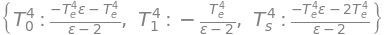

In [21]:
# Solve for radiative equilibrium 
fourthpower = sympy.solve(radeq2, [T_s**4, T_1**4, T_0**4])
fourthpower

A little manipulation gets us the solutions for temperatures that we want:

In [22]:
# need the symbolic fourth root operation
from sympy.simplify.simplify import nthroot

fourthpower_list = [fourthpower[key] for key in [T_s**4, T_0**4, T_1**4]]
solution = sympy.Matrix([nthroot(item,4) for item in fourthpower_list])
#  Display result as matrix equation!
T = sympy.Matrix([T_s, T_0, T_1])
sympy.Equality(T, solution)

       ⎡     _________________⎤
       ⎢    ╱     4         4 ⎥
       ⎢   ╱  - Tₑ ⋅ε - 2⋅Tₑ  ⎥
       ⎢4 ╱   ─────────────── ⎥
       ⎢╲╱         ε - 2      ⎥
       ⎢                      ⎥
⎡Tₛ⎤   ⎢      _______________ ⎥
⎢  ⎥   ⎢     ╱     4       4  ⎥
⎢T₀⎥ = ⎢    ╱  - Tₑ ⋅ε - Tₑ   ⎥
⎢  ⎥   ⎢ 4 ╱   ─────────────  ⎥
⎣T₁⎦   ⎢ ╲╱        ε - 2      ⎥
       ⎢                      ⎥
       ⎢           _______    ⎥
       ⎢          ╱  -1       ⎥
       ⎢    Tₑ⋅4 ╱  ─────     ⎥
       ⎣       ╲╱   ε - 2     ⎦

Plugging in the value of ε allows us to get the solutions in terms of $T_e$:

In [23]:
Tsolution = solution.subs(v)
#  Display result as matrix equation
sympy.Equality(T, Tsolution)

⎡Tₛ⎤   ⎡1.16100165920293⋅Tₑ ⎤
⎢  ⎥   ⎢                    ⎥
⎢T₀⎥ = ⎢1.02705141589558⋅Tₑ ⎥
⎢  ⎥   ⎢                    ⎥
⎣T₁⎦   ⎣0.916068424462217⋅Tₑ⎦

Now we just need to know the Earth's emission temperature $T_e$ which is measured as 255K:

In [24]:
Te_value = 255

#  Output 4 significant digits
Trad = sympy.N(Tsolution.subs([(T_e, Te_value)]), 4)
sympy.Equality(T, Trad)

⎡Tₛ⎤   ⎡296.1⎤
⎢  ⎥   ⎢     ⎥
⎢T₀⎥ = ⎢261.9⎥
⎢  ⎥   ⎢     ⎥
⎣T₁⎦   ⎣233.6⎦

Let's compare this with what we observe which was plugged into `v` earlier:

In [25]:
sympy.Equality(T, T.subs(v))

⎡Tₛ⎤   ⎡288⎤
⎢  ⎥   ⎢   ⎥
⎢T₀⎥ = ⎢275⎥
⎢  ⎥   ⎢   ⎥
⎣T₁⎦   ⎣230⎦

We observe that the radiative equilibrium solution is substantially warmer at the surface and colder in the lower troposphere than reality. This is a general feature of radiative equilibrium so using it as the basis for our greenhouse model is not a complete picture.  We will need to refine our model to get closer to the observed lapse rate value for atmospheric temperature. We are going to have a look at that observed lapse rate next and use it with a Python package called [`climlab`](https://github.com/climlab/climlab).

### 5. EBM v4 with 30 layer GHG contribution using `climlab`

#### 5.1 Introducing `climlab` and using it with our simple EBM models

[`climlab`](https://github.com/climlab/climlab) is a python package for climate modeling.  It provides a very general concept of a model as a collection of interacting processes each of which can contain a complex tree of sub-processes all inheriting from a `Process` class.  New classes of model can easily be defined and run interactively by putting together an appropriate collection of sub-processes.  Install it thus:
```
$ pip install climlab
```

Let's see what it does with our zero-dimensional EBM with the ε fudge factor from section 2 of this notebook.  Do we get the same expected equilibrium surface temperature $T_s$ of 288.65K and $ASR$ of 240.1 $W/m^2$?  In order to get started we will build a simple EBM with just the two processes addressing OLR and ASR.  We will use the ε emissivity fudge factor in `tau` and then step through 730 days (approximately two years) to ensure the EBM reaches radiative equilibrium:

In [26]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import climlab

# create a zero-dimensional domain with a single surface temperature
state = climlab.surface_state(num_lat=1,  # a single point
                              water_depth = 100.,  # 100 meters slab of water (sets the heat capacity)
                             )
#  create the longwave radiation process
olr = climlab.radiation.Boltzmann(name='OutgoingLongwave',
                                  state=state, 
                                  tau = ε,
                                  eps = 1.,
                                  timestep = 60*60*24*30.)
#  create the shortwave radiation process
asr = climlab.radiation.SimpleAbsorbedShortwave(name='AbsorbedShortwave',
                                  state=state, 
                                  insolation=S/4, 
                                  albedo=α,
                                  timestep = 60*60*24*30.)
#  couple them together into a single model equivalent to our v2 EBM above.
ebm1 = olr + asr
#  Give the parent process name
ebm1.name = 'Zero dimensional EBM with fudge factor'
print(f"1. Created simple EBM with the following Processes:\n{ebm1.subprocess}")
days = 730
print(f"2. Running to radiative equlibrium by stepping through {days} days")
for i in range(days):
    ebm1.step_forward()
print(f"3. State values:\n{ebm1.state}")
# Need to convert to K
Ts = celsius_to_kelvin(ebm1.state.get('Ts')[0]) 
ASR = ebm1.diagnostics.get('ASR')
print(f"------- EBM2: one layer EBM with emissivity ε={ε} --------\nTs = {Ts}\nASR = {ASR} W/m2\n")

1. Created simple EBM with the following Processes:
AttrDict({'OutgoingLongwave': <climlab.radiation.boltzmann.Boltzmann object at 0x15eec8750>, 'AbsorbedShortwave': <climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave object at 0x12f9c6690>})
2. Running to radiative equlibrium by stepping through 730 days
3. State values:
AttrDict({'Ts': Field([[15.49410157]])})
------- EBM2: one layer EBM with emissivity ε=0.61 --------
Ts = [288.64410157]
ASR = 240.1 W/m2



This is close to the observed values.

Now let's see what it does with radiative equilibrium in a two-layer model where we are expecting $T_s$=296.1K, $T_0$=261.9K and $T_1$=233.6K.  The absorptivity value here comes from the analysis [in this notebook](https://github.com/brian-rose/ClimateModeling_courseware/blob/master/Lectures/Lecture07%20--%20Elementary%20greenhouse%20models.ipynb).  Here we switch the step through in time to a convenience function called `integrate_years`:

In [27]:
ebm3 = climlab.GreyRadiationModel(num_lev=2)
print(f"1. Created `GreyRadiationModel` with the following Processes:\n{ebm3.subprocess}")
LW = ebm3.subprocess['LW']
#  copying the tuned value of epsilon from Lecture 6 notes
LW.absorptivity = 0.586
years = 30.
print(f"2. Running to radiative equlibrium over {years} years")
ebm3.compute_diagnostics()
ebm3.integrate_years(years)
#  The temperatures at radiative equilibrium
print(f"3. State values:\n{ebm3.state}")
Ts = ebm3.state.get('Ts')[0]
T1,T0 = ebm3.state.get('Tatm')
print(f"------- EBM3: 2 layer grey gas model --------\nTs = {Ts}\nT0 = {T0}\nT1 = {T1}")

1. Created `GreyRadiationModel` with the following Processes:
AttrDict({'LW': <climlab.radiation.greygas.GreyGas object at 0x12fe1c710>, 'SW': <climlab.radiation.greygas.GreyGasSW object at 0x15f21cc90>, 'insolation': <climlab.radiation.insolation.FixedInsolation object at 0x15b78fbd0>})
2. Running to radiative equlibrium over 30.0 years
Integrating for 10957 steps, 10957.266000000001 days, or 30.0 years.
Total elapsed time is 29.999271716137947 years.
3. State values:
AttrDict({'Ts': Field([296.38447744]), 'Tatm': Field([233.72131677, 262.28540225])})
------- EBM3: 2 layer grey gas model --------
Ts = 296.3844774386438
T0 = 262.28540225146156
T1 = 233.72131677329338


This is also close to the observed values.

#### 5.2 Observed 30 layer GHG model with `climlab`

Now we can try going to the next stage and building a model with 30 layers using `climblab`.  Before we do that, let's look at the actual observed if we break the atmosphere down into 30 layers.  The original source for this data is NOAA as outlined in [this notebook](https://github.com/brian-rose/ClimateModeling_courseware/blob/master/Lectures/Lecture08%20--%20Grey%20radiation%20modeling%20with%20climlab.ipynb).  Unfortunately it's no longer accessible so we're going to hand code the interpolated observed values in for comparison purposes and then pass it into a `GreyRadiationModel` instance which is able to model the corresponding pressures.  Pressures are supplied in hPa (hectopascal).  1hPa is equivalent to 1mb (millibar) meaning that 1000hPA is broadly atmospheric pressure at sea level.  500 hPa is the pressure in the trophosphere at roughly 5000m above sea level.  This area is important for understanding surface weather, upper air storms tend to be steered in the direction of the winds at this level and are highly correlated with surface weather.

In [28]:
import numpy as np

ebm4observed = climlab.GreyRadiationModel()
print(f"1. Created `GreyRadiationModel` with the following Processes:\n{ebm4observed.subprocess}")
LW = ebm4observed.subprocess['LW']
ebm4observed.subprocess.LW.absorptivity = 0.05369
Tobserved = np.array([224.34736633, 211.6633606 , 206.96233453, 208.29142253,
       212.58642578, 217.19396973, 221.78252157, 226.3520813 ,
       231.30422974, 236.08017476, 240.67991638, 245.279658  ,
       249.35979716, 252.92033386, 256.48087056, 259.66789246,
       262.48139954, 265.29490662, 267.81303914, 270.03579712,
       272.25855509, 274.21642049, 275.90939331, 277.60236613,
       279.29533895, 280.98831177, 282.48550415, 283.98269653,
       285.6810201 , 287.4463874 ])
# Initialize model with observed temperatures
ebm4observed.Ts[:] = 288.65
ebm4observed.Tatm[:] = Tobserved
print(f"3. State values (based on actual observations):\n{ebm4observed.state}")
Ts = ebm4observed.state.get('Ts')[0]
Tvalues = ebm4observed.state.get('Tatm').tolist()
Pressures = ebm4observed.lev.tolist()
print(f"------- EBM4: 30 layer model (observed) --------\nTs = {Ts}\n\
{len(Tvalues)} T values =\n{Tvalues}\n{len(Tvalues)} Pressures =\n{Pressures}")

1. Created `GreyRadiationModel` with the following Processes:
AttrDict({'LW': <climlab.radiation.greygas.GreyGas object at 0x15f232e50>, 'SW': <climlab.radiation.greygas.GreyGasSW object at 0x15f2333d0>, 'insolation': <climlab.radiation.insolation.FixedInsolation object at 0x15f2337d0>})
3. State values (based on actual observations):
AttrDict({'Ts': Field([288.65]), 'Tatm': Field([224.34736633, 211.6633606 , 206.96233453, 208.29142253,
       212.58642578, 217.19396973, 221.78252157, 226.3520813 ,
       231.30422974, 236.08017476, 240.67991638, 245.279658  ,
       249.35979716, 252.92033386, 256.48087056, 259.66789246,
       262.48139954, 265.29490662, 267.81303914, 270.03579712,
       272.25855509, 274.21642049, 275.90939331, 277.60236613,
       279.29533895, 280.98831177, 282.48550415, 283.98269653,
       285.6810201 , 287.4463874 ])})
------- EBM4: 30 layer model (observed) --------
Ts = 288.65
30 T values =
[224.34736633, 211.6633606, 206.96233453, 208.29142253, 212.58642578

#### 5.3 Graphing the observed temperature-pressure distribution

In [29]:
import pandas as pd

def zstar(lev):
    return -np.log(lev / climlab.constants.ps)

df = pd.DataFrame({'Pressure':Pressures})
df['logPressure'] = df.Pressure.apply(zstar)
df['Temperature (observed)'] = Tvalues
df.head()

,Pressure,logPressure,Temperature (observed)
0,16.666667,4.094345,224.347366
1,50.000000,2.995732,211.663361
2,83.333333,2.484907,206.962335
3,116.666667,2.148434,208.291423
4,150.000000,1.897120,212.586426


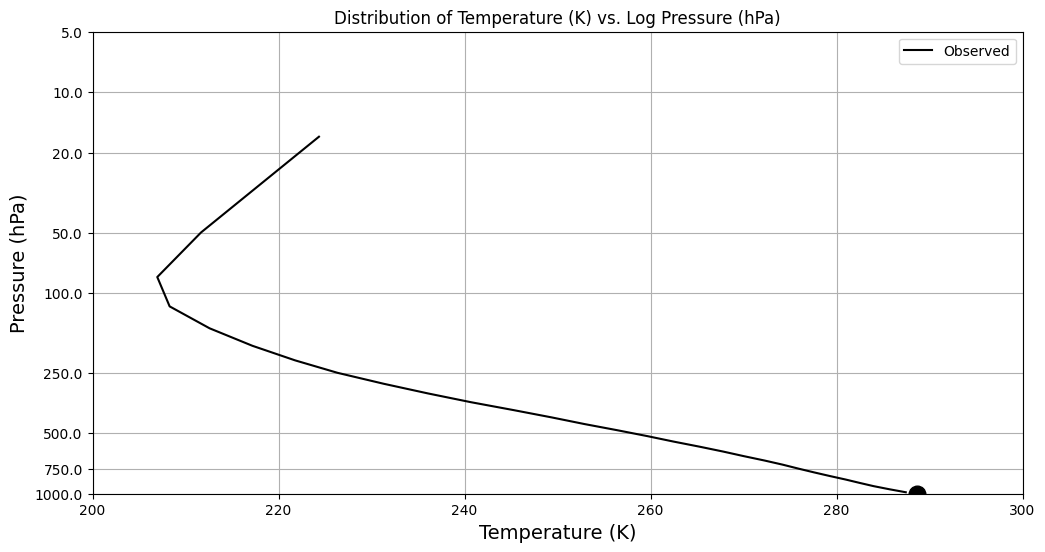

In [30]:
def plot_temperature_profiles(df, tslist, temperature_list=[], pressure_list=[], label_list=[], fixed_range=True):
    # 1. We always start with a baseline observed Temperature-Pressure graph 
    # Tslist has to be present for all cases including our baseline
    base_x = 'Temperature (observed)'
    base_y = 'logPressure'
    ax = df.plot(kind='line', x=base_x, y=base_y, color='k', label='Observed', figsize=(12,6))
    ax.plot(tslist[0], 0, 'o', markersize=12, color='k')
    # 2. Now add any additional graphs captured by column titles for df in temperature_list and pressure_list.
    # label_list contains the human readable title we want to use in our legend
    color_cycle=['r', 'g', 'b']
    for i, temperatures in enumerate(temperature_list):
        pressures = pressure_list[i]
        ax.plot(df[temperatures], df[pressures], '-', markersize=1, color=color_cycle[i], label=label_list[i])    
        ax.plot(tslist[i+1], 0, 'o', markersize=12, color=color_cycle[i])
    yticks = np.array([1000., 750., 500., 250., 100., 50., 20., 10., 5.])
    ax.set_yticks(-np.log(yticks/1000.))
    ax.set_yticklabels(yticks)
    ax.set_xlabel('Temperature (K)', fontsize=14)
    ax.set_ylabel('Pressure (hPa)', fontsize=14)
    ax.grid()
    ax.legend()
    if fixed_range:
        ax.set_xlim([200, 300])
        ax.set_ylim(zstar(np.array([1000., 5.])))
    ax.set_title(f"Distribution of Temperature (K) vs. Log Pressure (hPa)")
    return ax

Tslist = [Ts]
_ = plot_temperature_profiles(df, Tslist)

Note the way the observed temperature starts to go back up in the uppermost part of the atmosphere from 100Pa upwards. This is due to the effect of [ozone in the stratosphere](https://scied.ucar.edu/learning-zone/atmosphere/stratosphere) which we will try to model in the next section:

> Ozone, a type of oxygen molecule that is relatively abundant in the stratosphere, heats this layer as it absorbs energy from incoming ultraviolet radiation from the Sun. Temperatures rise as one moves upward through the stratosphere.
 
First, let's look at where we end up with our radiative equilibrium with the default `climlab` `GreyRadiationModel`:

#### 5.4 Radiative equilibrium in our 30 layer GHG model

Let's clone our `ebm4observed` model:

In [31]:
ebm4 = climlab.process_like(ebm4observed)
print(f"1. Created `GreyRadiationModel` with the following Processes:\n{ebm4.subprocess}")
ebm4.subprocess['LW'].absorptivity *= 1.02
ebm4.subprocess['LW'].absorptivity
years = 2.
print(f"2. Running to radiative equlibrium over {years} years")
ebm4.compute_diagnostics()
ebm4.integrate_years(years)
#  The temperatures at radiative equilibrium
Ts = ebm4.state.get('Ts')[0]
Tslist.append(Ts)
Tvalues = ebm4.state.get('Tatm').tolist()
Pressures = ebm4.lev.tolist()
print(f"------- EBM4: 30 layer model radiative equilibrium --------\nTs = {Ts}\n\
{len(Tvalues)} T values =\n{Tvalues}\n{len(Tvalues)} Pressures =\n{Pressures}")

1. Created `GreyRadiationModel` with the following Processes:
AttrDict({'LW': <climlab.radiation.greygas.GreyGas object at 0x15f3a8710>, 'SW': <climlab.radiation.greygas.GreyGasSW object at 0x15f3d5690>, 'insolation': <climlab.radiation.insolation.FixedInsolation object at 0x15bd52990>})
2. Running to radiative equlibrium over 2.0 years
Integrating for 730 steps, 730.4844 days, or 2.0 years.
Total elapsed time is 1.9986737567564754 years.
------- EBM4: 30 layer model radiative equilibrium --------
Ts = 297.0196928868095
30 T values =
[215.808025486313, 218.70383336486128, 221.488977743639, 224.1728502031684, 226.76364751636723, 229.2685698028894, 231.69397881237416, 234.04552565505062, 236.3282548409939, 238.5466897482364, 240.7049033877812, 242.8065774207573, 244.85505170913498, 246.85336617825607, 248.80429638966564, 250.7103839332301, 252.57396252479992, 254.39718052282137, 256.18202044207425, 257.9303159361158, 259.6437666353729, 261.32395116018955, 262.9723385737165, 264.590298495

Let's plot the new temperatures obtained through radiative equilibrium on top of the observed data graph.

[288.65, 297.0196928868095]


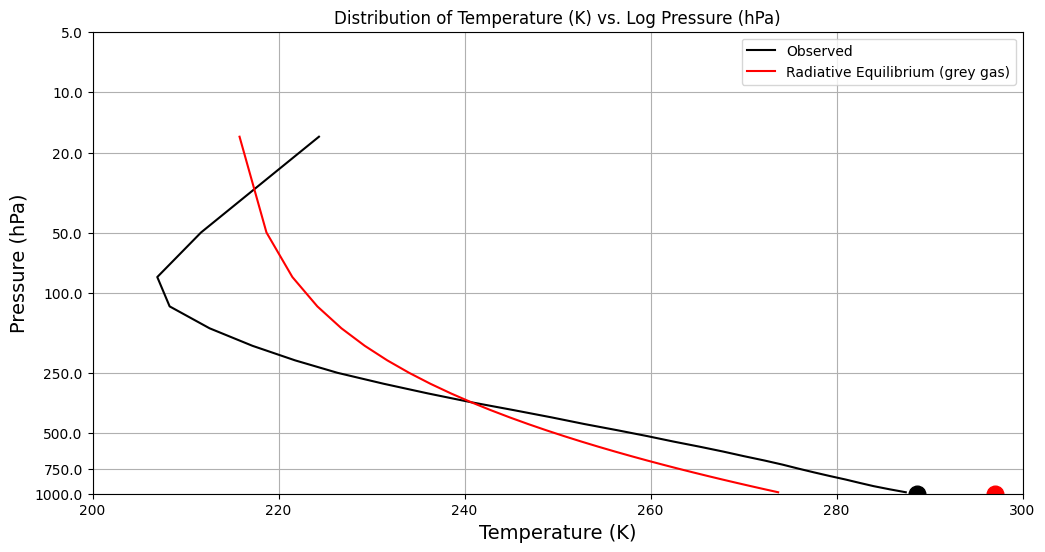

In [32]:
print(Tslist)
df['Temperature (grey gas)'] = Tvalues
_ = plot_temperature_profiles(df, Tslist,
    temperature_list=['Temperature (grey gas)'], 
    pressure_list=['logPressure'],
    label_list=['Radiative Equilibrium (grey gas)'])

Note the following properties of the radiative equilibrium temperature profile in red:

* The surface is warmer than observed.
* The lower troposphere is colder than observed.
* Very cold air is sitting immediately above the warm surface.
* There is no tropopause, no stratosphere.

We're going to add convection and ozone effects in the next section to get closer to the observed profile.

### 6. EBM v5 with 30 layer GHG contribution including convection and ozone impact

#### 6.1 Accounting for convection in our 30 layer GHG model

The large drop in temperature in the last EBM just above the surface is unphysical.  Air in direct contact with the ground will be warmed by mechanisms other than radiative transfer and will **convect upward**, mixing heat content with the environment.  This is broadly true on average across the earth although importantly not at the poles where its absence is a key contributing factor to [Arctic Amplification](https://www.carbonbrief.org/guest-post-why-does-the-arctic-warm-faster-than-the-rest-of-the-planet/) in relation to warming.  We can parameterize the average statistical effects of heat mixing through a convective adjustment which we add to `climlab` as a new `Process`.  At each timestep, the new model checks for any locations at which the **lapse rate** exceeds the `adj_lapse_rate` threshold. Unstable layers are removed through "_an energy-conserving mixing formula_".  Our new `ebm5` model now looks like this:

In [33]:
from climlab import convection

ebm5 = climlab.process_like(ebm4)
conv = convection.ConvectiveAdjustment(state=ebm5.state, adj_lapse_rate=6.)
ebm5.add_subprocess('Convective Adjustment', conv)
print(f"1. Created `GreyRadiationModel` with Convective Adjustment. Processes:\n{ebm4.subprocess}")
print(f"2. Running to radiative equlibrium over {years} years")
ebm5.compute_diagnostics()
ebm5.integrate_years(years)
#  The temperatures at radiative equilibrium
Ts = ebm5.state.get('Ts')[0]
Tslist.append(Ts)
Tvalues = ebm5.state.get('Tatm').tolist()
Pressures = ebm5.lev.tolist()
print(f"------- EBM5: addition of convection --------\nTs = {Ts}\n\
{len(Tvalues)} T values =\n{Tvalues}\n{len(Tvalues)} Pressures =\n{Pressures}")

1. Created `GreyRadiationModel` with Convective Adjustment. Processes:
AttrDict({'LW': <climlab.radiation.greygas.GreyGas object at 0x15f3a8710>, 'SW': <climlab.radiation.greygas.GreyGasSW object at 0x15f3d5690>, 'insolation': <climlab.radiation.insolation.FixedInsolation object at 0x15bd52990>})
2. Running to radiative equlibrium over 2.0 years
Integrating for 730 steps, 730.4844 days, or 2.0 years.
Total elapsed time is 3.997347513512951 years.
------- EBM5: addition of convection --------
Ts = 287.13389847645345
30 T values =
[215.80802534766372, 218.70383322743882, 221.48897760741505, 224.17285006812622, 226.76364738249734, 229.2685696701878, 231.69397868084212, 234.04552552469121, 236.3282547118136, 238.54668962024255, 240.70490326098277, 242.8065772951635, 246.19312485652927, 249.5450456784982, 252.69817781642448, 255.67687258394608, 258.50115205060814, 261.18768984119623, 263.7505272260321, 266.20160620646544, 268.55117323154104, 270.808089641436, 272.9800736701175, 275.07389143

Let's plot it onto the existing graphs:

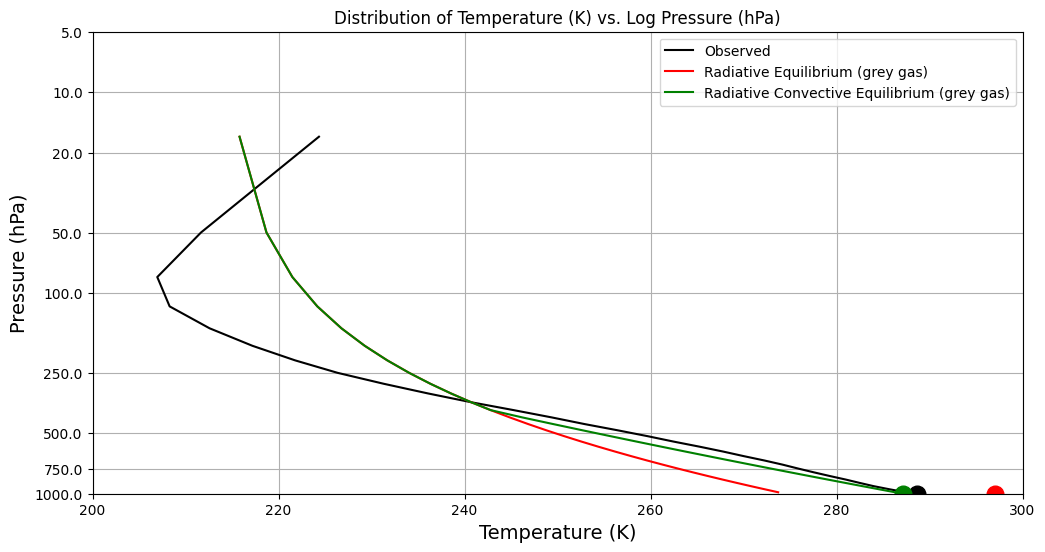

In [34]:
df['Temperature (convection)'] = Tvalues
_ = plot_temperature_profiles(df, Tslist,
    temperature_list=['Temperature (grey gas)','Temperature (convection)'], 
    pressure_list=['logPressure','logPressure'],
    label_list=['Radiative Equilibrium (grey gas)','Radiative Convective Equilibrium (grey gas)'])

We can see that introducing convective adjustment into the model (in green) cools the surface quite a bit compared to Radiative Equilibrium (in red) and warms the lower troposphere up to 500hPa. It gives us a much better fit to observations but we still have no stratosphere.  To fix that we need to add in the impact of ozone which we will do next.

#### 6.2 Accounting for Ozone with our 30 layer GHG model

Up to this point, all our EBMs have assumed the atmosphere is completely transparent to shortwave radiation.  There has been no equivalent of the stratosphere in any of our models, where temperature increases with height due to the ozone layer absorbing shortwave radiation.  We are going to model the impact of ozone on ASR next by modifying the ASR process.  We will use a new `RadiativeConvectiveModel` from `climlab` which has the convection handling from the last one built in.  The ozone level data here comes from the CESM community model [per the outline in this notebook](https://github.com/brian-rose/ClimateModeling_courseware/blob/master/Lectures/Lecture08%20--%20Grey%20radiation%20modeling%20with%20climlab.ipynb).  Note there are 26 levels here.

In [35]:
oz_lev = np.array([  3.544638,   7.388814,  13.967214,  23.944625,  37.23029 ,  53.114605,
        70.05915 ,  85.439115, 100.514695, 118.250335, 139.115395, 163.66207 ,
       192.539935, 226.513265, 266.481155, 313.501265, 368.81798 , 433.895225,
       510.455255, 600.5242  , 696.79629 , 787.70206 , 867.16076 , 929.648875,
       970.55483 , 992.5561  ])
O3_global = np.array([7.827929e-06, 8.641505e-06, 7.589400e-06, 5.245671e-06, 3.177616e-06,
       1.823200e-06, 9.807570e-07, 6.228705e-07, 4.476205e-07, 3.344812e-07,
       2.625703e-07, 2.078981e-07, 1.570746e-07, 1.124255e-07, 8.060050e-08,
       6.278265e-08, 5.429906e-08, 4.995061e-08, 4.600757e-08, 4.229778e-08,
       3.805591e-08, 3.387686e-08, 3.121716e-08, 2.978071e-08, 2.879810e-08,
       2.754299e-08])

# The RadiativeConvectiveModel is pre-defined in climlab.
# It contains the same components are our previous model 
# but here we are specifying a different set of vertical levels.
ebm6 = climlab.RadiativeConvectiveModel(lev = oz_lev, adj_lapse_rate=6)
# This number is an arbitrary parameter that scales how absorptive 
# we are making the ozone in our grey gas model
ozonefactor = 75
dp = ebm6.Tatm.domain.lev.delta
epsSW = O3_global * dp * ozonefactor
ebm6.subprocess['SW'].absorptivity = epsSW
years = 10.
print(f"1. Created `RadiativeConvectiveModel` with ozone absorption added. Processes:\n{ebm4.subprocess}")
print(f"2. Running to radiative equlibrium over {years} years")
ebm6.compute_diagnostics()
ebm6.integrate_years(years)
#  The temperatures at radiative equilibrium
Ts = ebm6.state.get('Ts')[0]
Tslist.append(Ts)
Tvalues = ebm6.state.get('Tatm').tolist()
Pressures = ebm6.lev.tolist()
print(f"------- EBM6: addition of ozone --------\nTs = {Ts}\n{len(Tvalues)} T values =\n\
{Tvalues}\n{len(Tvalues)} Pressures =\n{Pressures}")

1. Created `RadiativeConvectiveModel` with ozone absorption added. Processes:
AttrDict({'LW': <climlab.radiation.greygas.GreyGas object at 0x15f3a8710>, 'SW': <climlab.radiation.greygas.GreyGasSW object at 0x15f3d5690>, 'insolation': <climlab.radiation.insolation.FixedInsolation object at 0x15bd52990>})
2. Running to radiative equlibrium over 10.0 years
Integrating for 3652 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 9.998844602294039 years.
------- EBM6: addition of ozone --------
Ts = 279.19365210022994
26 T values =
[251.09387798880755, 254.1759253568638, 250.64223339765306, 242.00869565088183, 233.79847531513687, 228.31780792680362, 225.09192559466993, 224.18871134844875, 224.21217154429547, 224.66507310108722, 225.49831809972758, 226.61259251858786, 227.96663267918956, 229.5994628962641, 231.57066779785697, 233.91318968086844, 236.6342697804389, 241.0953761202962, 248.07873112053886, 255.26436246448728, 262.02153867666715, 267.7286568804382, 272.2881606302

Let's now graph the impact of ozone on the other ones we have built to date.  Note that there are only 26 values for ozone temperatures and log pressures so we need to add two new columns to our `df`:

In [36]:
df_ozone = pd.DataFrame({'PressureOzone':Pressures,'Temperature (ozone)':Tvalues})
df['logPressureOzone'] = df_ozone.PressureOzone.apply(zstar)
df_merged = pd.concat([df, df_ozone], axis=1)

In [37]:
df_merged.loc[:, ['Temperature (observed)','logPressure','Temperature (ozone)','logPressureOzone']].tail(10)

,Temperature (observed),logPressure,Temperature (ozone),logPressureOzone
20,272.258555,0.380772,262.021539,0.361262
21,274.216420,0.333144,267.728657,0.238635
22,275.909393,0.287682,272.288161,0.142531
23,277.602366,0.244197,275.637769,0.072948
24,279.295339,0.202524,277.731271,0.029887
25,280.988312,0.162519,278.827341,0.007472
26,282.485504,0.124053,NaN,NaN
27,283.982697,0.087011,NaN,NaN
28,285.681020,0.051293,NaN,NaN
29,287.446387,0.016807,NaN,NaN


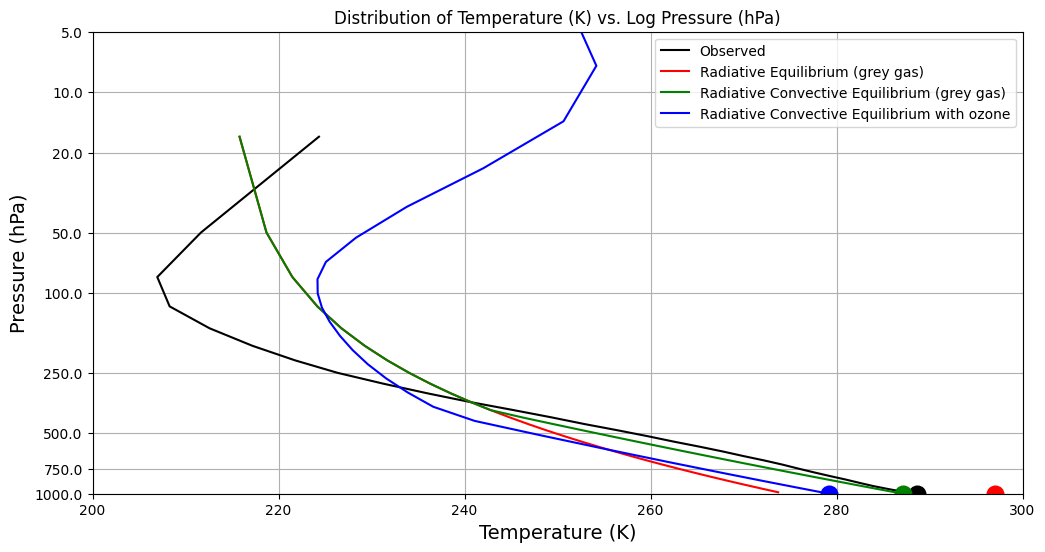

In [38]:
_ = plot_temperature_profiles(df_merged, Tslist,
    temperature_list=['Temperature (grey gas)','Temperature (convection)','Temperature (ozone)'],
    pressure_list=['logPressure','logPressure','logPressureOzone'],
    label_list=['Radiative Equilibrium (grey gas)','Radiative Convective Equilibrium (grey gas)',\
                'Radiative Convective Equilibrium with ozone'])

Now we finally have something that looks looks like the actual **tropopause** (the natural boundary between the troposphere and the stratosphere), with temperature increasing above at approximately the correct rate and the profile as expected. v5 takes EBM a long way from the very simple v1 model we started with.  There are, however, still plenty of discrepancies between this model solution and the observations, including:

* Tropopause temperature is too warm, by about 15 degrees.
* Surface temperature is too cold
* Stratospheric temeperature is too warm.

There are a number of parameters we might adjust if we wanted to improve the fit, including:

* Longwave absorptivity
* Surface albedo
* Stratospheric cooling caused by $CO_2$ in the troposphere.

Stratospheric cooling is a particularly important phenomenon which is directly correlated with rising $CO_2$ concentrations.  [This video by Sabine Hossenfelder](https://www.youtube.com/watch?v=oqu5DjzOBF8&t=945s) provides more context on the greenhouse effect and stratospheric cooling.

### 7. Taking things further

#### 7.1 More sophisticated Climate Models

EBMs are a simple type of climate model that can predict average global surface temperature as a function of the overall energy balance of Earth. There are many different types.  The following are a few key ones in rough order of increasing complexity taken from [the taxonomy available here](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/climate-system-models.html):

* **Radiative-Convective (RC) or Single-Column Models (SCMs)**: These models focus on processes in the vertical column.  RC models compute the (usually global average) temperature profile by explicit modelling of radiation and convection processes, which together determine the lapse rate.
* **Integrated Assessment Models (IAMs)**: These couple the climate system to models of economic activity to more fully assess the impact of particular policy choices affective emissions. They are able to factor in human developmnet and societal choices and are particularly useful for climate mitigation purposes.  See [here](https://www.iamconsortium.org/what-are-iams/) for more context.
* **Global Circulation Models (GCMSs)**: These models incorporate the three-dimensional nature of the atmosphere and ocean.  They can exist as fully coupled ocean-atmosphere models or, for testing and evaluation, as independent ocean or atmospheric circulation models.  By simulating as many processes as possible they can produce a three-dimensional picture of the time evolution of the state of the whole climate system.  GCMs are able to make climate predictions through timestepping.  Google recently released their [Neural GCM](https://research.google/blog/fast-accurate-climate-modeling-with-neuralgcm/).
* **Earth System Models (ESMs)**: Moving even further forward in climate modeling history, more processes that used to be fixed come to be incorporated into GCMs and the coupling becomes more complete: e.g. changes in biomes and vegetation, chemical changes in atmosphere, ocean and soil.  Such models are now generally known as Earth System Models.  [CESM](https://www.cesm.ucar.edu/about/mission-vision) is a community effort to build an ESM.

#### 7.2 Climate Sensitivity

**Climate sensitivity** is the average change in global mean surface temperature in response to a radiative forcing. There are three chief types of climate sensitivity: 
* The **"equilibrium climate sensitivity" (ECS)** is the long-term increase in global average temperature we expect to reach once the effects of a doubled CO2 concentration have had time to reach a steady state.
* The shorter-term **"transient climate response" (TCR)** reveals how much warmer the Earth is expected to get at that time when we double the concentration of CO2 compared to pre-industrial levels—around 280ppm. 
* The **“Earth system sensitivity” (ESS)** includes very long-term Earth system feedbacks, such as changes in ice sheets or in the distribution of vegetative cover.

Climate sensitivity has long been "the key uncertainty in projections of future climate change."  Climate models attempt to model for dynamic change through feedback.  The discretized equations are then solved numerically by timestepping.  Lots of refinements are possible to a zero-dimensional EBM to support it.  See [this lecture](https://florianboergel.github.io/climateoftheocean/2020-11-11-energy-model.html) for some pointers on ways forward.  The other models also allow for timestepping.